<a href="https://colab.research.google.com/github/javed075/NYC_Taxi_Time_Prediction_model/blob/main/NYC__Taxi_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : NYC taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City**

##### **Project Type**    - Regression
##### **Contribution**    - Individual
#***BY-JAVED AHMAD  (javedahmad075@gmail.com)***

# **Project Summary -**The NYC Taxi Time Prediction project aims to predict the amount of time a taxi trip will take in New York City, based on various features such as pickup and dropoff locations, time of day, and weather conditions.

A regression model was developed to predict the duration of the taxi trip. The model was trained on a large dataset of over 1.5 million taxi trips, which were randomly split into training and testing sets.

The features used in the regression model included distance, pickup and dropoff coordinates, pickup datetime, day of the week, and weather conditions such as temperature, precipitation, and wind speed.

The model was evaluated using various metrics such as Mean Squre Error (MSE) and Root Mean Squared Error (RMSE),R2 Score,Adjusted R2-Score and was compared to other machine learning algorithms such as Linear Regression,Decision Tree Random Forest, Gradient Boosting andXgboost. The regression model outperformed the other algorithms in terms of accuracy, with an R2 score of 67%.

Overall, the NYC Taxi Time Prediction project demonstrates the potential for regression models to accurately predict the duration of taxi trips in New York City, using a combination of various features such as location, time, and distance.

#**GitHub Link -**https://github.com/javed075/NYC_Taxi_Time_Prediction_model.git

# **Problem Statement**-
To Build a machine learning model that predicts the duration of NYC taxi trip using the dataset which includes pickup time, geo-coordinates, the number of passengers, and several other variables

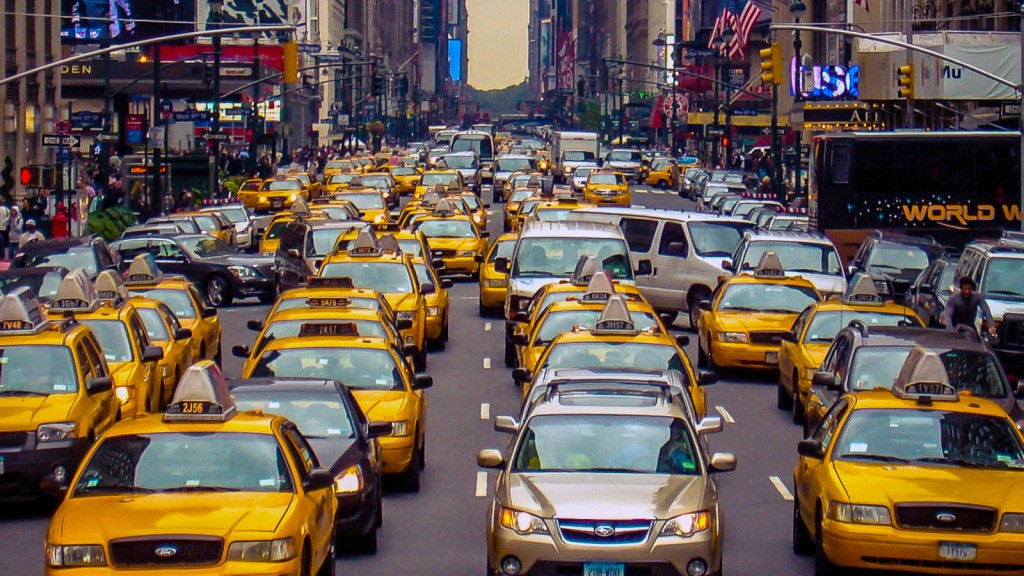

#**1. Know Our Data**

##Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

##Importing the Dataset

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Almabetter/ capstone project2/NYC Taxi Data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Almabetter/ capstone project2/NYC Taxi Data.csv'

##Exploring the Dataset

In [ ]:
df.head()

### Dataset Rows & Columns count

In [ ]:
# finding no of rows and no of columns in data set
print('no of rows:',df.shape[0])
print('no of columns:',df.shape[1])

### Dataset Information

In [ ]:
df.info()

By this operation we know that there is no missing value in our data set.Almost all data type is in their proper fotmat only pickup_date time and dropoff date time in string format which we have to change in their correct format.

###Duplicate Values

In [ ]:
# make a function to check null values and unique values.
def information():
 x=pd.DataFrame(index=df.columns)
 x["data type"]=df.dtypes
 x["null values"]=df.isnull().sum()
 x["unique values"]=df.nunique()
 return x


In [ ]:
information()

by above we can see that there is no null value in our data set.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

###**Column Details**
Id: A unique identifier for each trip

Vendor Id: A unique identifier for vendor

Pickup Datetime: Date and time of pickup

Dropoff Datetime: Date and time of dropoff

Passenger Count: The number of passengers in the vehicle (driver entered value)

Pickup Longitude: The longitude where the meter was engaged

Pickup Latitude: The latitude where the meter was engaged

Dropoff Longitude: The longitude where the meter was disengaged

Dropoff Latitude: The latitude where the meter was disengaged

Store and Fwd Flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

Trip Duration: Duration of time in seconds

##Let us finally check for a statistical summary of our dataset.
##Note that this function can provide statistics for numerical features only.

In [ ]:
df.describe()

**Some insights from the above summary:**


* Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.

* Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

## 3. ***Data Wrangling***

In [ ]:
# converting into proper date format
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"])

In [ ]:
df["dropoff_datetime"].dtypes

In [ ]:
# finding pickup and drop month
df["pickup_month"]=df["pickup_datetime"].dt.month
df["dropoff_month"]=df["dropoff_datetime"].dt.month

In [ ]:
#finding pickup and drop 
df["pickup_date"]=df["pickup_datetime"].dt.day
df["dropoff_date"]=df["dropoff_datetime"].dt.day

In [ ]:
# Creating pickup and dropoff weekdays
df['pickup_weekday'] =df['pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['dropoff_datetime'].dt.weekday
     

In [ ]:
# Creating pickup and dropoff hours
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] =df['dropoff_datetime'].dt.hour

In [ ]:
#creating pickup and dropoff day name
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [ ]:
df.head()

In [ ]:
# calculate trip duration in minute
df["trip_duration_in_minute"]=df["trip_duration"]/60

In [ ]:
# calculate the distance by given geospatial co ordinate in kilometer
from geopy.distance import great_circle
  
df['distance'] = df.apply(lambda row: great_circle((row['pickup_latitude'], row["pickup_longitude"]), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#Chart-1

In [ ]:
# percentage of trip by vendor
percentage_of_vend_1=round(len(df[df["vendor_id"]==1])/len(df)*100,1)
percentage_of_vend_2=round(len(df[df["vendor_id"]==2])/len(df)*100,1)
total_percentage=[percentage_of_vend_1,percentage_of_vend_2]
total_percentage

In [ ]:
plt.figure(figsize = (6,8))
c=['rosybrown','gray']
plt.pie(total_percentage, labels = ['Vendor ID 1','Vendor ID 2'],autopct='%.1f%%',colors=c,shadow=True)
plt.title('Distribution of the vendor id for the taxi trip',fontsize=18)
plt.show()

 - We can observe that vendor 2 has a higher number of bookings (54%).


#Chart-2

In [ ]:
df["store_and_fwd_flag"].value_counts()

In [ ]:
#Store & Forward flag

plt.figure(figsize=(6,8))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

* We see there are less than 1% of trips that were stored before forwarding.

#Chart-3

In [ ]:
##Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x="pickup_day",data=df,ax=ax[0])
ax[0].set_title('No. of pickups done on each day')
sns.countplot(x="dropoff_day",data=df,ax=ax[1])
ax[1].set_title('No. of dropoff done on each day')
plt.show()

* Above plots interpret that in a week, "friday", and "saturday" have higher number of pickups and dropoffs.

* We can see that compared to other days, taxi booking rates are higher on the weekends ( Friday and Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.

#Chart-4

In [ ]:
# diving the time in to different timezone
def timezone(x):
  if x>=6 and x<10:
    return "morning"
  elif x>=10 and x<16:
    return "mid day"  
  elif x>=16 and x<22:
    return "evevning" 
  elif x>=22 or x<6:
    return "late night"  

In [ ]:
#apply that function
df["pickup_time_zone"]=df.pickup_hour.apply(timezone)
df["dropoff_time_zone"]=df.dropoff_hour.apply(timezone)


In [ ]:
# Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_time_zone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_time_zone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

* we can see that evening is the busiet time of whole day. people take the taxi to come fro office and going for party at evening and dinner. after that at mid day maximum ride taken because people were going to office after 10 am.

#Chart-4

In [ ]:
#Trip Duration by the month.
sns.lineplot(x='pickup_month',y='trip_duration',data=df,color='green')
plt.show()

* From February, we can see trip duration rising every month. 

#Chart-5

In [ ]:
# distribution of ride in complete 24 hours hourly basis
plt.figure(figsize=(10,6))
sns.countplot(x=df["pickup_hour"])
plt.title("ditribution of pickup during 24 hours")
plt.show()

* Distribution of pickup and dropoff hours follows same pattern, it shows that most of the pickups and dropoffs are in the evening. We can see that people often use taxi services to get to their workplaces in the mornings after 10:00 AM. and busiet time is 6PM to 7PM.

#Chart-6

In [ ]:
#aggegate vendor id by pickup month
monthly_pickup_by_vendor=df.groupby(["pickup_month","vendor_id"]).size()
monthly_pickup_by_vendor = monthly_pickup_by_vendor.unstack()


In [ ]:
monthly_pickup_by_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')
plt.show()

* We can see that both vendors' trips are at their maximum in the month of March and their lowest in the month of January, February, and after June.

#Chart-7

In [ ]:
#Passenger Count
df.passenger_count.value_counts()

In [ ]:
# distribution of passenger 
plt.figure(figsize=(10,5))
sns.countplot(x=df["passenger_count"])
plt.title('Distribution of passenger count')
plt.show()

* We can notice that most of the bookings are made by solo traveler.which means less number of people prefer car pool or may be less number of groups book car...people prefer to ride solo

#Chart-8

In [ ]:
# divide trip duration in differnt bins 
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']

In [ ]:
plt.figure(figsize=[10,5])
df1=pd.cut(df['trip_duration_in_minute'],bins=[0,1,10,30,60,1440,1440*2,50000],labels=labels)
df.groupby(df1)['trip_duration_in_minute'].count().plot(kind='bar')
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.xlabel("trip duration")
plt.xticks(rotation=45)
plt.show()

* By above chart we can see that most of trip duration 10 to 30 minute. some trip also goes on hourly.long trip with in day very rare.

#distribution of differnt features

In [ ]:
# Histplots and boxplots to determine distribution the data given below
numeric_feature=['passenger_count','distance','trip_duration_in_minute','pickup_hour', 'dropoff_hour']
numeric_feature

In [ ]:
for col in numeric_feature:
  fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
  sns.histplot(data=df,x=col,ax=ax[0])
  ax[0].axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[0].axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  sns.boxplot(data=df, x=col, ax=ax[1])
  ax[1].axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[1].axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.tight_layout()

##(histplot) distance and trip_duration graphs are highly skewed.
##(boxplot) distance and trip_duration columns have a lot outliers as well

#Multicollinearity and correlation check

#**Heatmap**

In [ ]:
plt.figure(figsize=(18,8))
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

* By above haetmap it visulaize that pickup_month and dropp off month is 100% correlated.Along with pickup hour ,dropoff hour,pickup weekday and dropoff week day,trip duration and trip duration in minute are highly correlated.

In [ ]:
def correlated (dataset,thresold):
  corr_column=set()    # all the highly corelated column
  for i in range(len(correlation.columns)):
      for j in range(i):
        if abs(correlation.iloc[i,j])>=thresold:  # we want absolute value
          column_name=correlation.columns[i]      # getting the name of columns
          corr_column.add(column_name)            # add he name column in empty set
  return corr_column        
          

In [ ]:
# Calling the function with threshold value 0.90
highly_correlated_features=correlated(df,0.90)
print('total highly correlated features:',len(set(highly_correlated_features)))

In [ ]:
highly_correlated_features

* by above  evaluation we can say that there are four column  they are highly correlated above 90%.
* it better to drop higly correlated features for better performance.

#checking skewness of target variable

In [ ]:
# dist plot of trip duration.
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.distplot(df.trip_duration,color='red',ax=ax[0],hist=False,kde_kws= {'shade':True, 'linewidth':2})
sns.distplot(np.log10(df["trip_duration"]),color='green',ax=ax[1],hist= False,kde= True,kde_kws= {'shade':True, 'linewidth':2})
ax[1].set_title("distribution after applying log transformation")


* BY above distribution we can see that target variable is higly right skewed .to remove the skewness we apply log transformation.after transformation we found normal distribution of targer variable.

#**Outlier Removal (Quartile Method)**

**Interquartile range measures the spread of the middle half of our data.**

**Formula: Q3 - Q1**

**where Q1- quartile 1 and Q3- quartile 3**

**lower limit of the data is given by Q1-1.5*IQR**

**upper limit of the data is given by Q3+1.5*IQR**

In [ ]:
#boxplot for visualizing for outliers
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(25,5))
sns.boxplot(df["trip_duration"],ax=ax[0])
sns.boxplot(df['passenger_count'],ax=ax[1])
sns.boxplot(df['distance'],ax=ax[2])

In [ ]:
#finding differnt quarters of trip_duration column
trip_duration_Q1=df['trip_duration'].quantile(0.25)
print('first quartile value ie 25th percentile of trip duration:',trip_duration_Q1)
trip_duration_Q2=df['trip_duration'].quantile(0.50)
print('second quartile value ie 50th percentile of trip duration:',trip_duration_Q2)
trip_duration_Q3=df['trip_duration'].quantile(0.75)
print('third quartile value ie 75th percentile of trip duration:',trip_duration_Q3)

In [ ]:
# calculate interquartile range
IQR=trip_duration_Q3-trip_duration_Q1
print('IQR:',IQR)
trip_duration_lower_limit=trip_duration_Q1-1.5*IQR
trip_duration_upper_limit=trip_duration_Q3+1.5*IQR
print('The lower limit of trip duration:',trip_duration_lower_limit)
print('The upper limit of trip duration:',trip_duration_upper_limit)

In [ ]:
#removing outliers in trip_duration features
df=df[df['trip_duration']>0]
df=df[df['trip_duration']<trip_duration_upper_limit]

In [ ]:
df.shape

In [ ]:
#finding differnt quarters of passenger_count column
passenger_count_Q1=df['passenger_count'].quantile(0.25)
print('first quartile value ie 25th percentile of passenger count:',passenger_count_Q1)
passenger_count_Q2=df['passenger_count'].quantile(0.50)
print('second quartile value ie 50th percentile of passenger count:',passenger_count_Q2)
passenger_count_Q3=df['passenger_count'].quantile(0.75)
print('third quartile value ie 75th percentile of passenger count:',passenger_count_Q3)

In [ ]:
# Calculating IQR
IQR= passenger_count_Q3 - passenger_count_Q1
passenger_count_lower_limit=passenger_count_Q1 - 1.5*IQR
passenger_count_upper_limit=passenger_count_Q3 + 1.5*IQR
print("The lower limit of passenger count:", passenger_count_lower_limit)
print("The upper limit of passenger count:", passenger_count_upper_limit)

In [ ]:
# Removing outliers
df=df[df['passenger_count']>0]
df=df[df['passenger_count']<passenger_count_upper_limit]

In [ ]:
df.shape

In [ ]:
#finding differnt quarters of distance column
distance_Q1=df['distance'].quantile(0.25)
print('first quartile value ie 25th percentile of distance:',distance_Q1)
distance_Q2=df['distance'].quantile(0.50)
print('second quartile value ie 50th percentile of distance:',distance_Q2)
distance_Q3=df['distance'].quantile(0.75)
print('third quartile value ie 75th percentile of distance:',distance_Q3)

In [ ]:
# Calculating IQR
IQR= distance_Q3 - distance_Q1
distance_lower_limit=distance_Q1 - 1.5*IQR
distance_upper_limit=distance_Q3 + 1.5*IQR
print("The lower limit of distance:", distance_lower_limit)
print("The upper limit of distance:", distance_upper_limit)

In [ ]:
# Removing outliers
df=df[df['distance']>0]
df=df[df['distance']<distance_upper_limit]

In [ ]:
df.shape

In [ ]:
# Earlier we saw that distance and tripduration had highly skewed graph... lets check the distribution again
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))
sns.distplot(df['distance'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="green", ax=ax[0])
sns.distplot(df['trip_duration'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="green", ax=ax[1])

##It seems both the columns now follow near to normal distribution

#**Textual Data Preprocessing**

#ONE HOT ENCODING
###Since we have textual data in our dataset which might create problems during model prediction, therefore we need to convert this textual data into dummy variables

In [ ]:
#add dummy variable to convert textual data to numerical data through one hot encoding
df=pd.get_dummies(df,columns=['store_and_fwd_flag', 'pickup_weekday', 'dropoff_weekday'],drop_first=True)

In [ ]:
df.shape

#Instead of dropping irrelevant or collinear columns we will be creating a separate list containg only those variables that are important and are not collinear
##(dropoff_date', 'dropoff_hour', 'dropoff_month', 'dropoff_weekday', 'trip_duration_minute are highly correlated according to the heatmap.)

In [ ]:
features=['vendor_id', 'passenger_count', 'distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag_Y','pickup_weekday_1', 
          'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4', 'pickup_weekday_5', 'pickup_weekday_6']

In [ ]:
final_df=df[features]
final_df.shape

#**STEP 8 - Supervised Machine Learning of NYC taxi trip time**

#**Evaluating which model is better. Therefore we will be calculating evaluation metrics for different models**

In [ ]:
# define a  function to calculate evaluation metrics
def evaluation_metrics (x_train,y_train,y_predicted):
  MSE=round(mean_squared_error(y_true=y_train, y_pred=y_predicted),4)
  RMSE=math.sqrt(MSE)
  R2_score=r2_score(y_true=y_train, y_pred=y_predicted)
  Adjusted_R2_score=1-((1-( R2_score))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))

  print("Mean Squared Error:",MSE,"Root Mean Squared Error:", RMSE)
  print("R2 Score :",R2_score,"Adjusted R2 Score :",Adjusted_R2_score)
  # plotting actual and predicted values
  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100], color='red') 
  plt.plot(np.array(y_train)[:100], color='green')
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')

  #return(MSE,RMSE,R2_score,Adjusted_R2_score)

In [ ]:
x=final_df[features]
y=df["trip_duration_in_minute"]


In [ ]:
# Importing train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#**Model 1 - Linear Regression**

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
a=lr.score(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_pred_train)

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_pred_test)

#Inference - As we can see that R2 score is very less and MSE is pretty high which means this algorithm is not suitable for our model

#**Model 2 - Decision Tree**

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10,12]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [6,10,16,20]

# Hyperparameter Grid
param_decision_tree = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
DTR = DecisionTreeRegressor()

# Grid search
decision_tree_grid = GridSearchCV(estimator=DTR,
                       param_grid = param_decision_tree,
                       cv = 5, verbose=2, scoring='r2')
decision_tree_grid.fit(x_train,y_train)


In [ ]:
decision_tree_grid.best_estimator_

In [ ]:
decision_tree_grid.best_score_

In [ ]:
decision_tree_optimal_model =decision_tree_grid.best_estimator_
y_predict_train_decision_tree=decision_tree_optimal_model.predict(x_train)
y_predict_test_decision_tree=decision_tree_optimal_model.predict(x_test)

In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_predict_train_decision_tree)

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_predict_test_decision_tree)

##Inference - This algorithm is better than the previous one (linear regression) but still the accuracy score is low.

#**Model 3 - Random Forest**

In [ ]:
RFR=RandomForestRegressor()

In [ ]:
# number of trees in random forest
n_estimators=[20,22,24]
#number of feature to consider at every split
max_features=[0.6]
# maximum number of level in trees
max_depth=[10,16] 
#number of samples
max_samples=[0.75,1.0]

# Hyperparameter Grid
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples,
            }
print(param_grid)


In [ ]:
RF_grid=GridSearchCV(estimator=RFR,param_grid=param_grid,cv=2,verbose=2)

In [ ]:
RF_grid.fit(x_train,y_train)

In [ ]:
RF_grid.best_params_

In [ ]:
RF_grid.best_score_

In [ ]:
Random_Forest_optimal_model =RF_grid.best_estimator_
y_predict_train_Random_Forest=Random_Forest_optimal_model.predict(x_train)
y_predict_test_Random_Forest=Random_Forest_optimal_model.predict(x_test)

In [ ]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_predict_train_Random_Forest)

In [ ]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_predict_test_Random_Forest)

##This algorithm has performed a little better that the previous one (accuracy score:67% train, 60% test). 

#**Model 4 - XG Boost**

In [ ]:
# Number of trees
total_estimators = [50]

# Maximum depth of trees
max_depth_of_trees = [7,9]
min_samples_split = [50]
#learning_rate=[0.1,0.3,0.5]

# Hyperparameter Grid
param_xgboost = {'total_estimators' : total_estimators,
              'max_depth' : max_depth_of_trees,
             'min_samples_split':min_samples_split
              }
     

In [ ]:
# Instantiate  XGBRegressor
import xgboost as xgb
xgboost_model = xgb.XGBRegressor()

# Grid search
xgboost_grid = GridSearchCV(estimator=xgboost_model,param_grid = param_xgboost,cv = 5, verbose=2,scoring="r2")

xgboost_grid.fit(x_train,y_train)

In [ ]:
xgboost_grid.best_score_

In [ ]:
xgboost_grid.best_params_

In [ ]:
xgboost_optimal_model =xgboost_grid.best_estimator_

In [ ]:
y_pred_xgboost_test=xgboost_optimal_model.predict(x_test)
y_pred_xgboost_train=xgboost_optimal_model.predict(x_train)

In [ ]:
#Evaluation metrics for Train set
evaluation_metrics(x_train,y_train,y_pred_xgboost_train)

In [ ]:
# Evaluation metrics for Test set
evaluation_metrics(x_test,y_test,y_pred_xgboost_test) 

##This algorithm has given the best accuracy score till now (66% train, 62% test) with low MSE

In [ ]:
x.columns


In [ ]:
importance=xgboost_optimal_model.feature_importances_
importance

In [ ]:
imp_dict = {'Feature' : list(x.columns),
                   'Feature Importance' : importance}

importance_df = pd.DataFrame(imp_dict)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

In [ ]:
# Feature importance plot
plt.figure(figsize=(16,6))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])
plt.xticks(rotation=45)
plt.show()
     

## As we can see that most important feature is our distance column which affect our dependent variable the most

#**Model 5 - Gradient Boost**

In [ ]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost_model=GradientBoostingRegressor()
gradient_boost_model.fit(x_train,y_train)

In [ ]:
y_preds_gradient_boost_test = gradient_boost_model.predict(x_test)
y_pred_gradient_boost_train=gradient_boost_model.predict(x_train)
     

In [ ]:
#Evaluation metrics for Train set
evaluation_metrics(x_train,y_train,y_pred_gradient_boost_train)

In [ ]:
#Evaluation metrics for Test set
evaluation_metrics(x_test,y_test,y_preds_gradient_boost_test)

##Above algorithm has an accuracy score of 55% which is lower that our previous algorithm (XG Boost)

#**STEP 9 - Comparing evaluation metrics of different models**

In [ ]:
# list of all evaluation matrics values
score_values=[[22.5249,4.746040454947682,0.48710009447510005,0.4870921983622618],
              [18.5693,4.309211064684578,0.5771718360098075,0.5771653265547303],
              [14.3663,3.790290226354705,0.672873788148407,0.6728687520283896],
              [ 14.7339,3.838476260184502,0.6645034691246143 , 0.6644983041432289],
              [19.6792,4.436124434683951,0.5518977478192577,0.5518908492686668]]
# Create the pandas DataFrame
df_score = pd.DataFrame(score_values,columns=['MSE', 'RMSE', 'R2', 'AdjustedR2'], index=['Linear Regression', 'Decision Tree', 'Random Forest', 'Xgboost', 'Gradientboost'])
df_score



In [ ]:
#bar plot for R2 score
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'Random Forest', 'Xgboost', 'Gradientboost']
ax1.set_title('R2 scores')
ax = sns.barplot(x = x_, y='R2', data =df_score , ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('R2 scores')

# barplot for adjustedR2 
ax = sns.barplot(x = x_, y='AdjustedR2',  data = df_score, ax = ax2)
ax2.set_title('Adjusted R2 scores')
ax.set_xlabel('Models')
ax.set_ylabel('Adjusted R2 scores')
plt.show()

##The above graph clearly shows that Random forest has highest R2 scores and adjusted R2 score which suggests that it has better efficiency than other models.

In [ ]:
#barplot of MSE score
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'Random Forest', 'Xgboost', 'Gradientboost']
ax1.set_title('MSE scores')
ax = sns.barplot(x = x_, y='MSE', data =df_score , ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('MSE score')

# barplot for RMSE score 
ax = sns.barplot(x = x_, y='RMSE',  data = df_score, ax = ax2)
ax2.set_title('RMSE score')
ax.set_xlabel('Models')
ax.set_ylabel('RMSE score')
plt.show()

##Only Random Forest has least errors, therefore it can be considered as good algorithm for training our model.

#**Conclusion for EDA:**
*   Vendor id distribution shows Vendor 2 receives more number of bookings
*   Store_and_ fwd_flag Count shows that majority of the time the taxi driver hasn't logged onto the vendor's systems.

*   Distribution of pickups and dropoffs on daily basis interprets that we can see that compared to other days, taxi booking rates are higher on the weekends (4- Friday and 5-Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.
*   Distribution of pickups and dropoffs on monthly basis shows that taxi reservations were more in the month of March and April.

*  Monthly trend for vendors tells us that both  vendors' trips are at their maximum in the month of March and their lowest in the month of January, February, and after June. 
*   Distribution of pickups and dropoffs on hourly basis gives us the insight that people often use taxi services to get to their workplaces in the mornings after 10:00. Additionally, the demand for taxis tends to surge in the late evening after six o'clock.

*  Passenger count distribution shows that most of the bookings are made by solo travelers, which means less number of people prefer car pool or amy be less number of groups book car...people prefer to ride solo



# **Conclusion for Model Training:**


*   There were a lot of outliers in our variables some values were near to zero, we tried to remove those values but we found that we were losing a lot of data.
 we trained our model using various algorithms and we got an accuracy of 67%.

*   we were curious whether the model was overfit or not, hopefully it was not, as it gave pretty much similar results for train and test data in all the algorithms tried.
*   In all the above model's graph we saw that actual and predicted values are almost near to each other (lines coinciding) in only 2 models namely: **XG Boost** and **Random Forest**.
 **R2 scores** were also **high** for the above two models and **MSE scores** were also **low** in these models which satisafies the requirements of a good model.

*    So we came to a conclusion that removing data removes a lot of information, new column if highly collinear can give pseudo good results,also we got our best R2 score from **Random Forest** model,we tried taking an optimum parameter so that our model doesnt overfit.

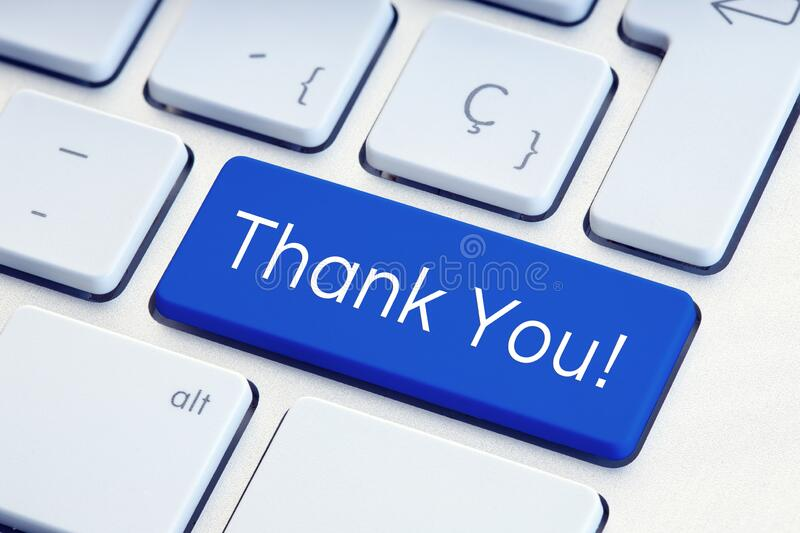